In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

import pickle

from imblearn.over_sampling import SMOTE

from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve,roc_auc_score

In [3]:
df = pd.read_excel(r"D:\Guvi\Projects\Industrial Copper Modeling\Data\Copper_Set.xlsx")

In [4]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.00,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,DEQ1 S460MC,1670798778,20210701.00,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.00,768.02,30202938.00,25.00,Won,W,41.00,0.80,1210.00,0000000000000000000000000000000000104991,1668701718,20210401.00,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.00,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,S0380700,628377,20210101.00,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.00,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.00,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.00,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,2_S275JR+AR-CL1,640665,20210301.00,577.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
# Convert Data Types
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [8]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [9]:
# Handling Null Values
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df['material_ref'] = df['material_ref'].fillna('unknown')
df = df.dropna()

In [10]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Plotting

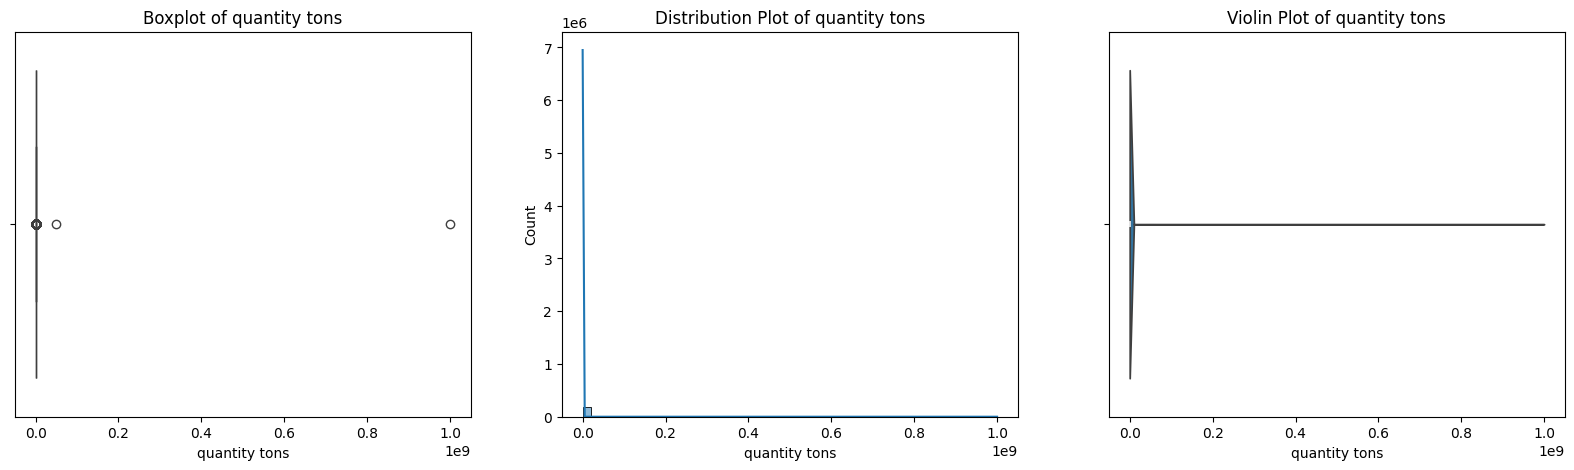

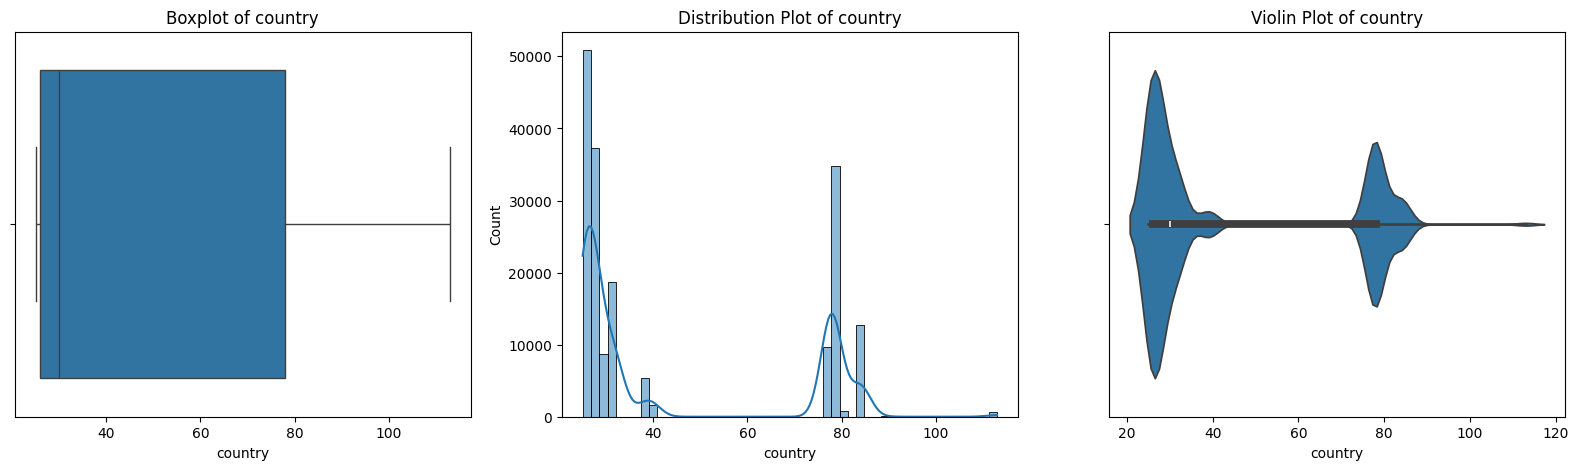

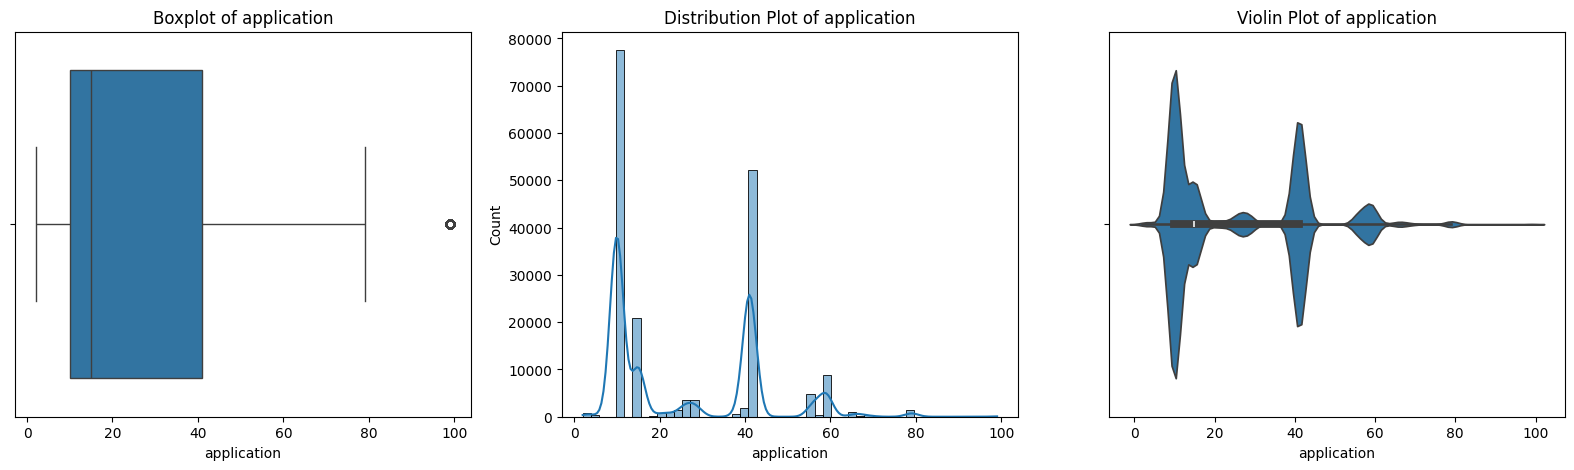

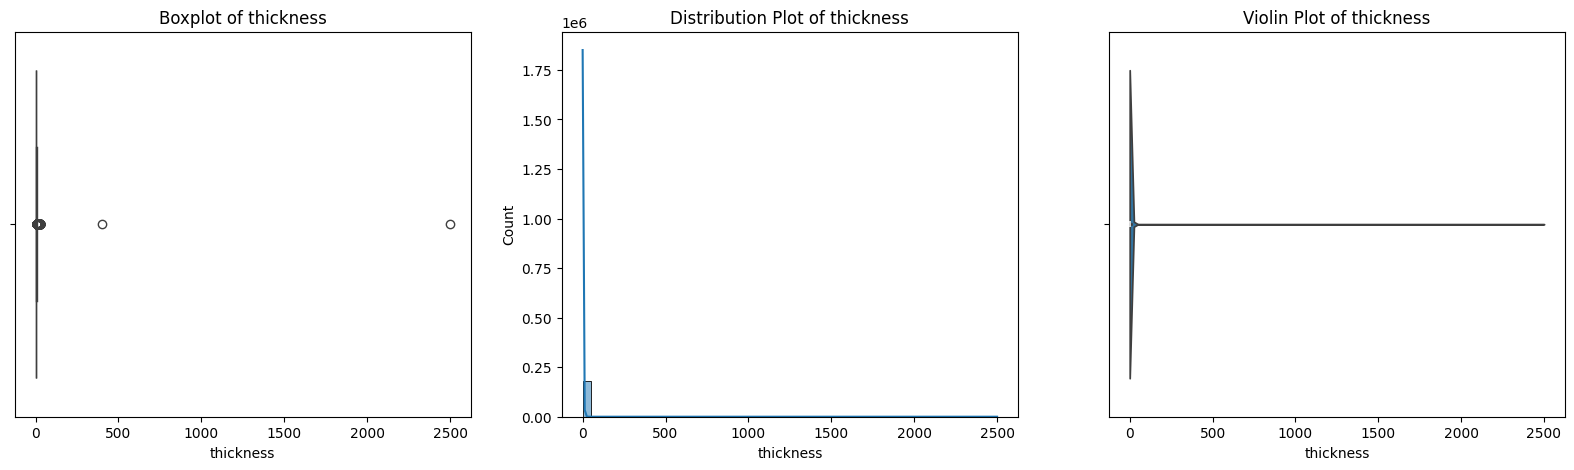

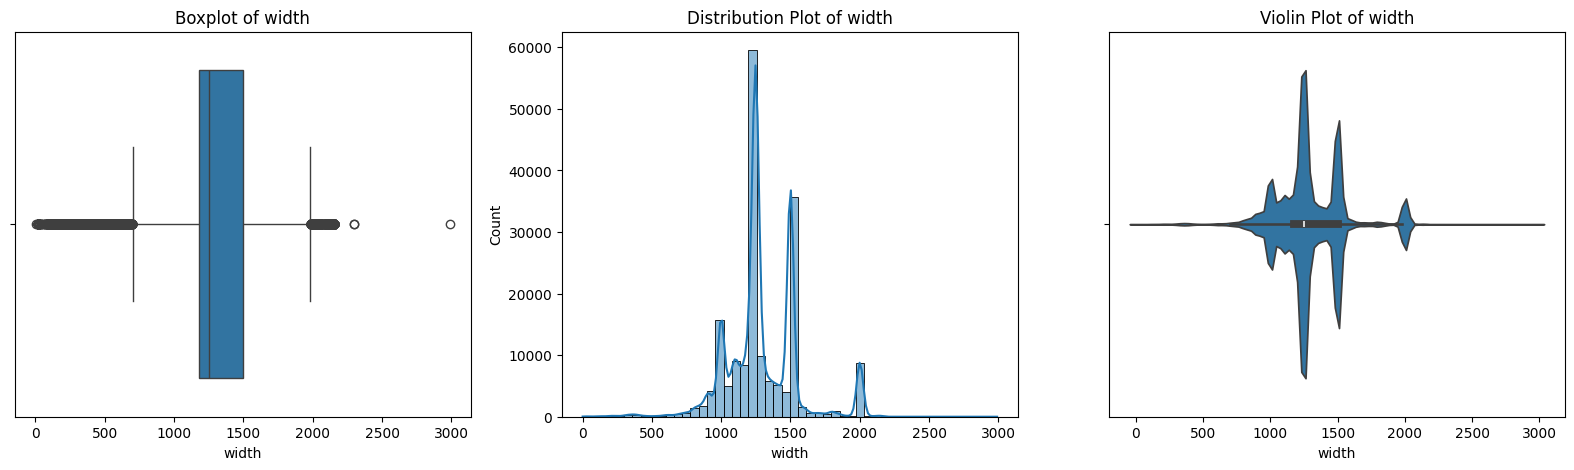

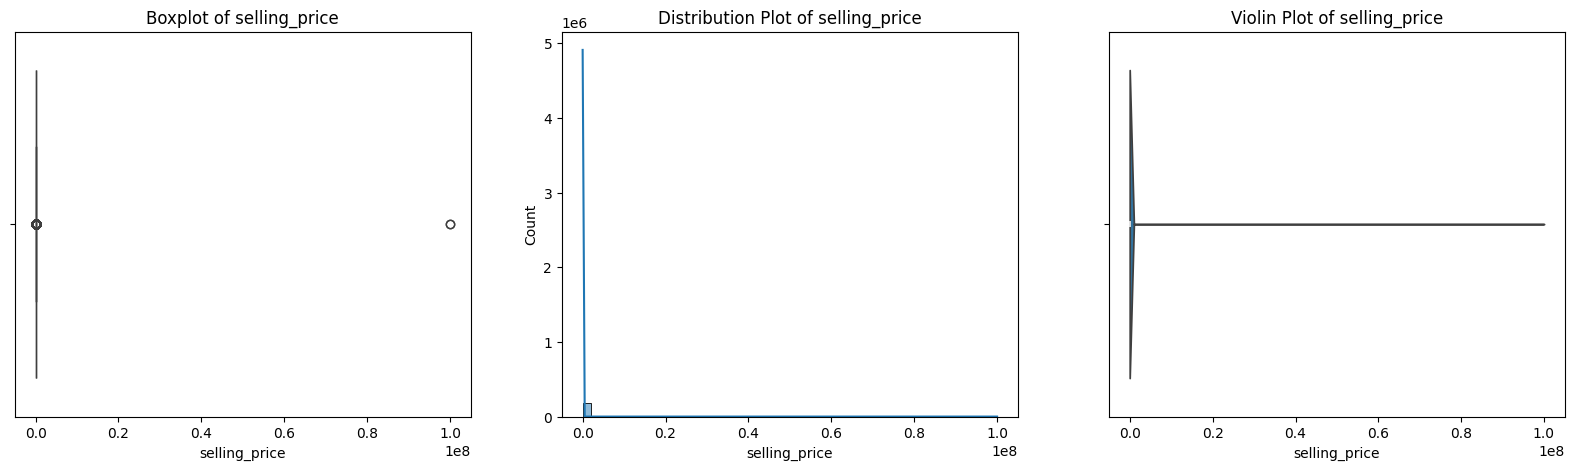

In [11]:
# Before Treatment

def visualize_outliers_skewness(df, columns):
    plt.figure(figsize=(20, 5))       
    # Boxplot
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=columns)
    plt.title(f'Boxplot of {columns}')
    
    # Distribution Plot
    plt.subplot(1,3,2)
    sns.histplot(data=df, x=columns, kde=True, bins=50)
    plt.title(f'Distribution Plot of {columns}')

    # Violin Plot
    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=columns)
    plt.title(f'Violin Plot of {columns}')

    plt.show()

for i in ['quantity tons', 'country', 'application', 'thickness', 'width', 'selling_price']:
    visualize_outliers_skewness(df, i)

In [12]:
# Skewness Handling
df['quantity tons_log'] = np.log(df['quantity tons'])
df['thickness_log'] = np.log(df['thickness'])
df['selling_price_log'] = np.log(df['selling_price'])

# Outliers Detection and Cap the Outliers 
def detect_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].index
    print(f'{columns} outliers: {len(outliers)}')

    df[columns] = np.where(df[columns] < lower_bound, lower_bound, df[columns])
    df[columns] = np.where(df[columns] > upper_bound, upper_bound, df[columns])

for i in ['quantity tons_log', 'country', 'application', 'thickness_log', 'width', 'selling_price_log']:
    detect_outliers_iqr(df, i)

quantity tons_log outliers: 3660
country outliers: 0
application outliers: 146
thickness_log outliers: 2
width outliers: 10948


selling_price_log outliers: 3423


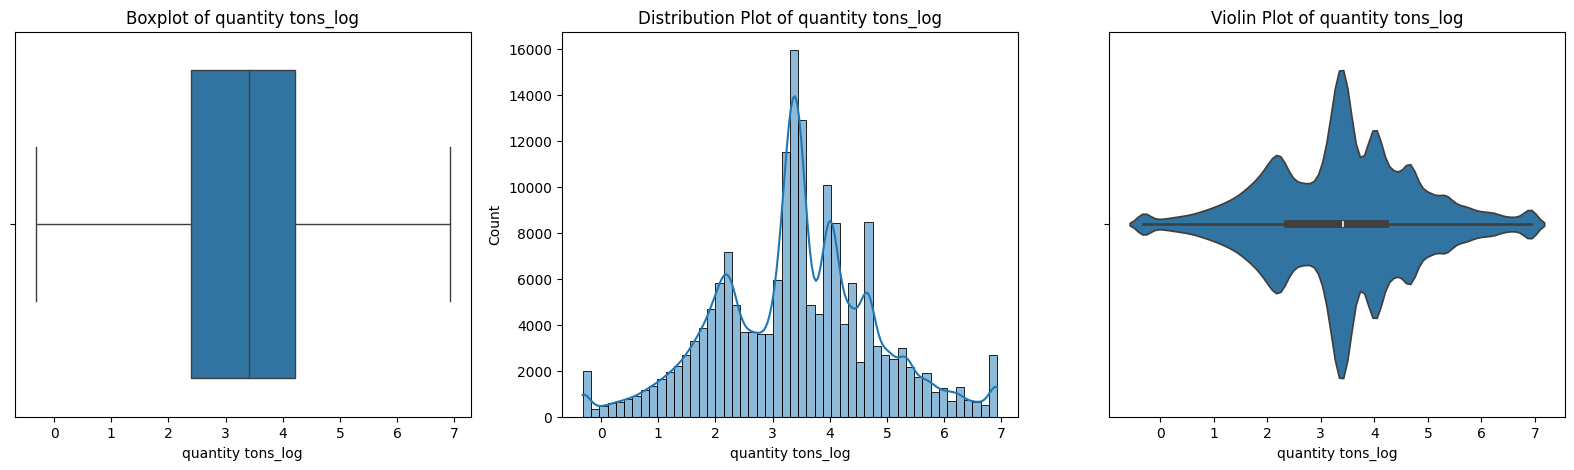

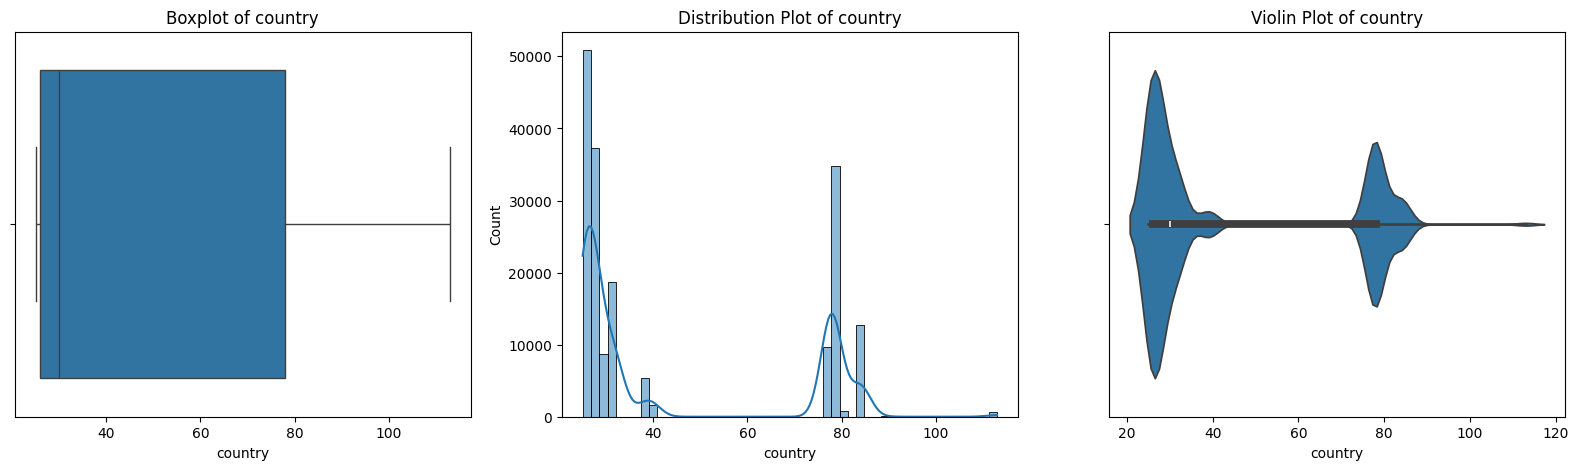

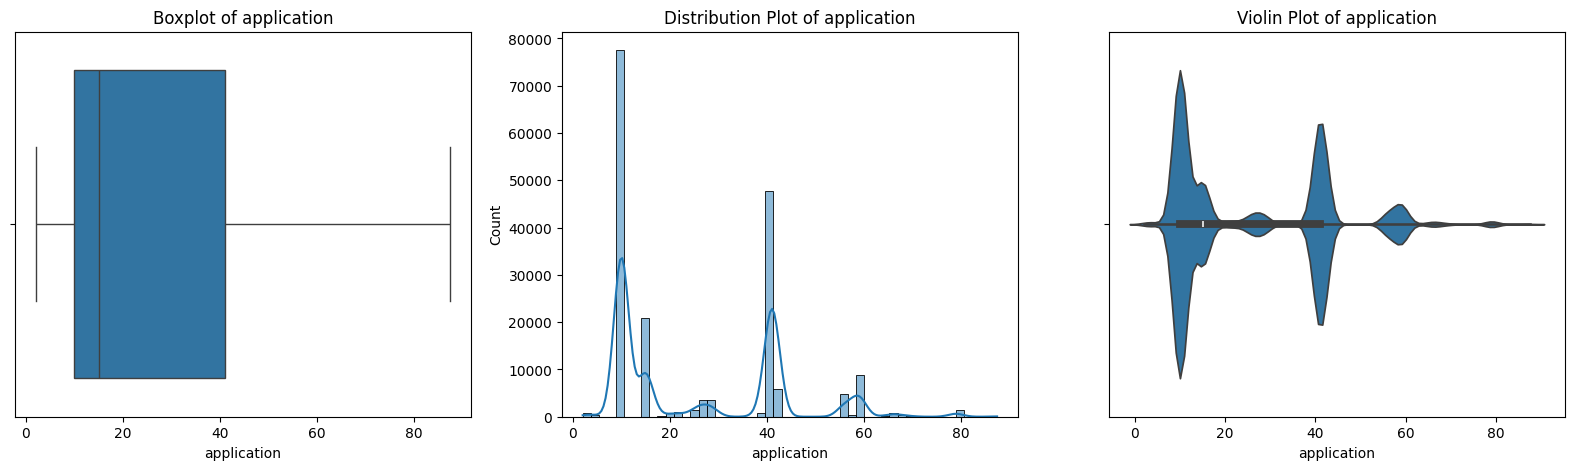

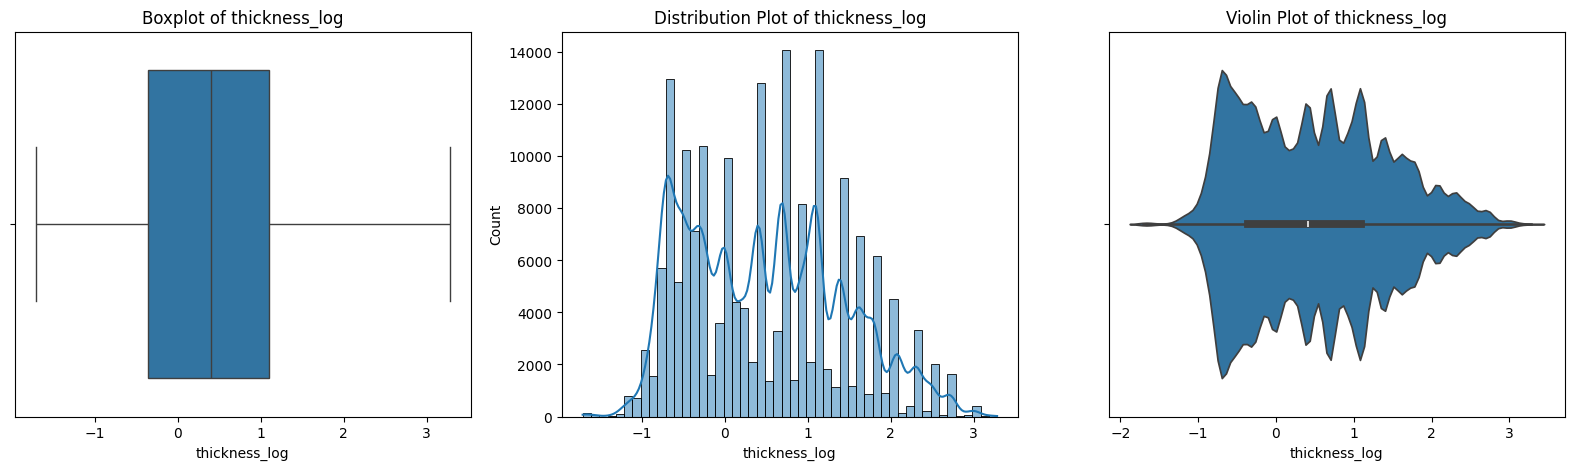

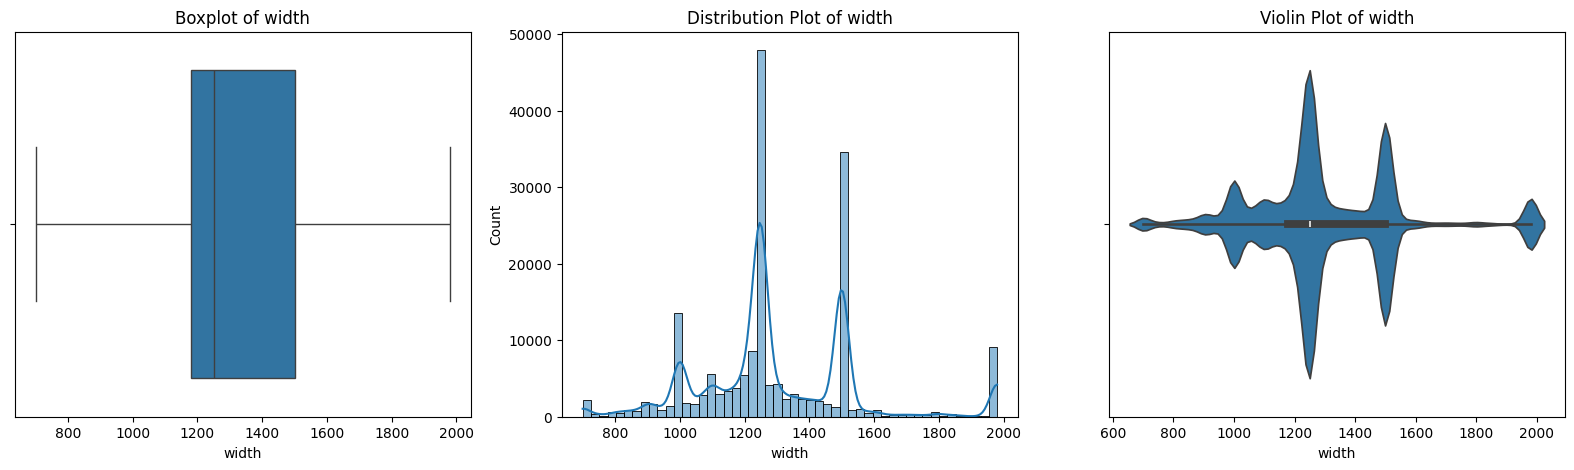

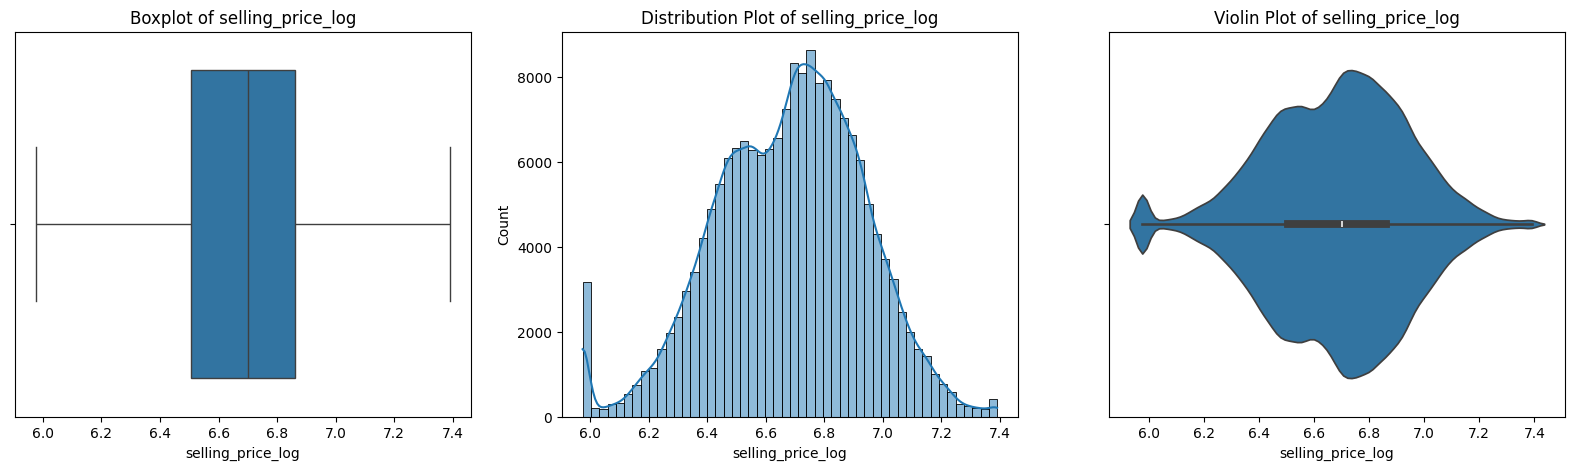

In [13]:
# After Treatment
for i in ['quantity tons_log', 'country', 'application', 'thickness_log', 'width', 'selling_price_log']:
    visualize_outliers_skewness(df, i)

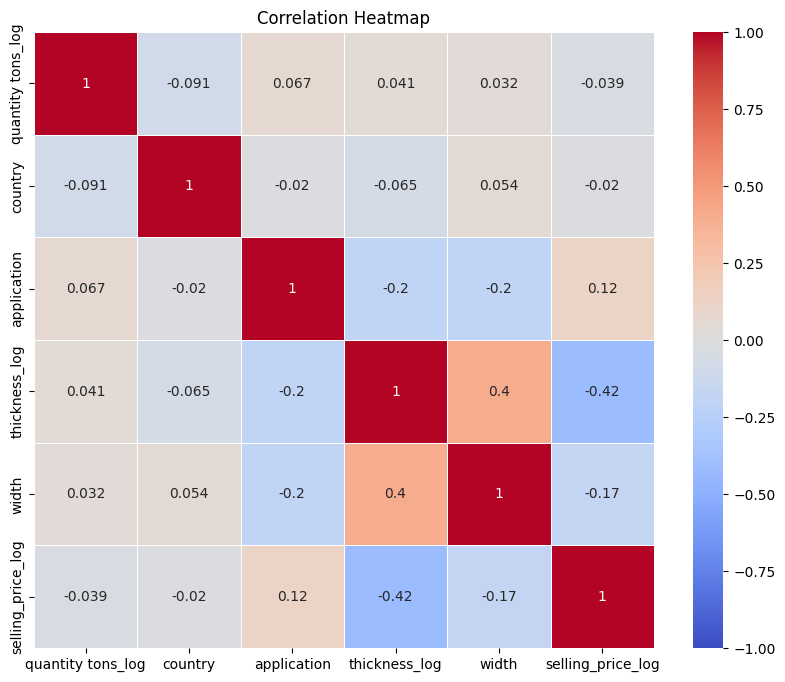

In [14]:
# Check for correlation
def corr_heatmap(corr):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

correlation = df[['quantity tons_log', 'country', 'application', 'thickness_log', 'width', 'selling_price_log']].corr()
corr_heatmap(correlation)


In [15]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [16]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [17]:
# Encoding Categorical Variables
df['status'] = df['status'].map({'Won': 1, 'Lost': 0, 'Draft': 2, 'To be approved': 3, 'Not lost for AM': 4,
                                 'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8})
df['item type'] = df['item type'].map({'W': 1, 'WI': 0, 'S': 2, 'Others': 3, 'PL': 4, 'IPL': 5, 'SLAWR': 6})

In [18]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

# Selling Price Prediction

In [19]:
df_reg = df.copy()

X = df_reg[['customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 'quantity tons_log',
       'thickness_log']]
y = df_reg['selling_price_log']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [20]:
print(np.isnan(y).sum())

5


In [21]:
# 5 Null values in selling_price_log
df_reg['selling_price_log'] = df_reg['selling_price_log'].fillna(df_reg['selling_price_log'].mean())

In [22]:
X = df_reg[['customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 'quantity tons_log',
       'thickness_log']]
y = df_reg['selling_price_log']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [23]:
print(np.isnan(y).sum())

0


In [24]:
# Find out best models

df_sample = df_reg.head(10000)
X_sample = df_sample[['customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 
                      'quantity tons_log', 'thickness_log']]
y_sample = df_sample['selling_price_log']

X_train_sample,X_test_sample,y_train_sample,y_test_sample = train_test_split(X_sample,y_sample,test_size=0.2) 

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

print(models)

  2%|▏         | 1/42 [00:01<01:14,  1.81s/it]

 98%|█████████▊| 41/42 [01:41<00:01,  1.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] Start training from score 6.916871


100%|██████████| 42/42 [01:42<00:00,  2.44s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.94       0.94  0.05        1.26
ExtraTreesRegressor                          0.94       0.94  0.05        6.88
RandomForestRegressor                        0.93       0.93  0.05        7.05
HistGradientBoostingRegressor                0.92       0.92  0.06        2.43
LGBMRegressor                                0.92       0.92  0.06        0.57
BaggingRegressor                             0.91       0.91  0.06        2.05
GradientBoostingRegressor                    0.87       0.87  0.07        2.60
DecisionTreeRegressor                        0.86       0.86  0.08        0.27
KNeighborsRegressor                          0.84       0.84  0.08        0.40
ExtraTreeRegressor                           0.76       0.76  0.10        0.13
MLPRegressor                                 0.73   

In [25]:
'''RandomForestRegressor
   XGBRegressor
   ExtraTreesRegressor
   DecisionTreeRegressor
'''

'RandomForestRegressor\n   XGBRegressor\n   ExtraTreesRegressor\n   DecisionTreeRegressor\n'

In [26]:
print(np.isnan(X).sum())

customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
quantity tons_log    4
thickness_log        0
dtype: int64


In [ ]:
# 4 Null values in quantity tons_log
df_reg['quantity tons_log'] = df_reg['quantity tons_log'].fillna(df_reg['quantity tons_log'].mean())

In [27]:
print(np.isnan(X).sum())

customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
quantity tons_log    4
thickness_log        0
dtype: int64


In [28]:
X = df_reg[['customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 'quantity tons_log',
       'thickness_log']]
y = df_reg['selling_price_log']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [29]:
# Choosing the model
models = [RandomForestRegressor(),
          XGBRegressor(),
          ExtraTreesRegressor(),
          DecisionTreeRegressor()]
     
for model in models:   
    model.fit(X_train, y_train) 
    train_pred = model.predict(X_train)  
    test_pred = model.predict(X_test)   

    print(f"********* {model.__class__.__name__} *********")
    print(f"Train MAE: {mean_absolute_error(y_train, train_pred)}")
    print(f"Train MSE: {mean_squared_error(y_train, train_pred)}")
    print(f"Train R²: {r2_score(y_train, train_pred)}")
    
    print(f"Test MAE: {mean_absolute_error(y_test, test_pred)}")
    print(f"Test MSE: {mean_squared_error(y_test, test_pred)}")
    print(f"Test R²: {r2_score(y_test, test_pred)} \n\n")

********* RandomForestRegressor *********
Train MAE: 1.6039803381903627e-06
Train MSE: 1.33119169836134e-10
Train R²: 0.9999999979580679
Test MAE: 4.545266314176952e-06
Test MSE: 1.209363903797617e-09
Test R²: 0.9999999814320141 


********* XGBRegressor *********
Train MAE: 0.0012266128415514763
Train MSE: 6.588745368685676e-06
Train R²: 0.9998989343859154
Test MAE: 0.0013403088649021429
Test MSE: 1.1131449250253583e-05
Test R²: 0.9998290931351211 


********* ExtraTreesRegressor *********
Train MAE: 3.079091077062224e-10
Train MSE: 6.249444988769283e-16
Train R²: 0.9999999999999905
Test MAE: 2.743837217188401e-06
Test MSE: 8.628813459758522e-10
Test R²: 0.999999986751739 


********* DecisionTreeRegressor *********
Train MAE: 3.297734278448584e-10
Train MSE: 1.9823109426109374e-15
Train R²: 0.9999999999999696
Test MAE: 5.310897698303519e-06
Test MSE: 4.332078515697068e-09
Test R²: 0.9999999334873707 




In [30]:
params = {
    'n_estimators':[50, 100],
    'max_features':['sqrt', 'log2', None],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [31]:
# RandomForestRegressor -  Easier Interpretability

# Finding best parameters
model = RandomForestRegressor()
params = {
    'n_estimators':[100, 150, 200],
    'max_features':['sqrt', 'log2', None],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
cv = GridSearchCV(model,params, n_jobs=-1, cv=5) # Utilize multiple processors to speed up the search
cv.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [32]:
cv.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 150}

In [33]:
cv.best_score_

np.float64(0.9161303049067155)

In [34]:
# Adding Parameters
X = df_reg[['customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 'quantity tons_log',
       'thickness_log']]
y = df_reg['selling_price_log']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

model = RandomForestRegressor(max_depth=None, max_features=None, min_samples_split=2, n_estimators=100)  
model.fit(X_train, y_train)
train_pred = model.predict(X_train)  
test_pred = model.predict(X_test)   

print(f"Train MAE: {mean_absolute_error(y_train, train_pred)}")
print(f"Train MSE: {mean_squared_error(y_train, train_pred)}")
print(f"Train R²: {r2_score(y_train, train_pred)}")

print(f"Test MAE: {mean_absolute_error(y_test, test_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, test_pred)}")
print(f"Test R²: {r2_score(y_test, test_pred)} \n\n")

Train MAE: 1.5863437826343592e-06
Train MSE: 1.151896188147231e-10
Train R²: 0.9999999982383665
Test MAE: 4.297304486966479e-06
Test MSE: 9.140088698085547e-10
Test R²: 0.9999999857966317 




In [35]:
df_reg.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.15,30156308.00,28.00,1,1,10.00,2.00,1500.00,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.75,0.69,6.75
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.02,30202938.00,25.00,1,1,41.00,0.80,1210.00,unknown,1668701718,2021-04-01,1047.00,6.95,-0.22,6.95


In [36]:
# Make the prediction

user_data = np.array([[30156308,28,1,1,10,1500,1670798778,6.75,0.69]])
y_pred = model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.750048513022153
Predicted selling price without Log:  854.1001965028538


In [37]:
user_data = {
    'customer': [30156308],
    'country': [28],
    'status': [1],
    'item type': [1],
    'application': [10],
    'width': [1500],
    'product_ref': [1670798778],
    'quantity tons_log': [6.75],
    'thickness_log': [0.69]
}

user_df = pd.DataFrame(user_data)

# Make the prediction
y_pred = model.predict(user_df)
print("Predicted selling price with Log: ", y_pred[0])
print("Predicted selling price without Log: ", np.exp(y_pred[0]))


Predicted selling price with Log:  6.750048513022153
Predicted selling price without Log:  854.1001965028538


In [38]:
# Saving the model
with open("model1.pkl","wb") as ft:
    pickle.dump(model,ft) 

with open("model1.pkl","rb") as ft:
    ml = pickle.load(ft)

In [39]:
y_pred = ml.predict(user_df)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.750048513022153
Predicted selling price without Log:  854.1001965028538


# Status Prediction

In [51]:
df_cls = df.copy()
df_status= df_cls[(df_cls["status"] == 1) | (df_cls["status"] == 0)]
df_status['status'].unique()

array([1, 0])

In [52]:
df_status['status'].value_counts() # Imbalanced Data

status
1    116004
0     34431
Name: count, dtype: int64

In [53]:
X= df_status[['customer', 'country', 'selling_price_log', 'item type', 'application', 'width', 'product_ref', 
              'quantity tons_log','thickness_log']]
y = df_status['status']

In [54]:
print(np.isnan(X).sum())

# 4 Null values in selling_price_log
df_status['selling_price_log'] = df_status['selling_price_log'].fillna(df_status['selling_price_log'].mean())

# 3 Null values in quantity tons_log
df_status['quantity tons_log'] = df_status['quantity tons_log'].fillna(df_status['quantity tons_log'].mean())

customer             0
country              0
selling_price_log    4
item type            0
application          0
width                0
product_ref          0
quantity tons_log    3
thickness_log        0
dtype: int64


In [ ]:
print(np.isnan(X).sum())

In [ ]:
print(np.isnan(y).sum())

In [55]:
X= df_status[['customer', 'country', 'selling_price_log', 'item type', 'application', 'width', 'product_ref', 
              'quantity tons_log','thickness_log']]
y = df_status['status']

In [61]:
# Reducing Imbalanced Data
ros = SMOTE()
X_new, y_new = ros.fit_resample(X,y)

In [62]:
y_new.value_counts()

status
1    116004
0    116004
Name: count, dtype: int64

In [66]:
# Choosing Best Model - Imbalanced Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          ExtraTreesClassifier()]
for model in models:
    
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(f"*********{type(model).__name__}*********")
    print(f"Train Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Train Precision: {precision_score(y_train,train_pred)}")
    print(f"Train Recall: {recall_score(y_train,train_pred)}")
    print(f"Train F1: {f1_score(y_train,train_pred)}")
    
    print(f"Test Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Test Precision: {precision_score(y_test,test_pred)}")
    print(f"Test Recall: {recall_score(y_test,test_pred)}")
    print(f"Test F1: {f1_score(y_test,test_pred)} \n \n")

*********LogisticRegression*********
Train Accuracy: 0.7717951274636886
Train Precision: 0.7717951274636886
Train Recall: 1.0
Train F1: 0.8712013206272979
Test Accuracy: 0.7684381958985609
Test Precision: 0.7684381958985609
Test Recall: 1.0
Test F1: 0.8690585825173379 
 

*********DecisionTreeClassifier*********
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1: 1.0
Test Accuracy: 0.9162761325489414
Test Precision: 0.9443893179170801
Test Recall: 0.9467993079584776
Test F1: 0.9455927773818009 
 

*********RandomForestClassifier*********
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1: 1.0
Test Accuracy: 0.9382457539801243
Test Precision: 0.9522290284158584
Test Recall: 0.9682093425605537
Test F1: 0.9601526979497298 
 

*********XGBClassifier*********
Train Accuracy: 0.9087396550004986
Train Precision: 0.9235542959982623
Train Recall: 0.9613281081779423
Train F1: 0.9420627007865293
Test Accuracy: 0.896599860404826
Test Precision: 0.9133578482006363


In [67]:
# Choosing Best Model - Balanced Data

x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2) 

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          ExtraTreesClassifier()]

for model in models:
    
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"*********{type(model).__name__}*********")
    print(f"Train Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Train Precision: {precision_score(y_train,train_pred)}")
    print(f"Train Recall: {recall_score(y_train,train_pred)}")
    print(f"Train F1: {f1_score(y_train,train_pred)}")
    
    print(f"Test Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Test Precision: {precision_score(y_test,test_pred)}")
    print(f"Test Recall: {recall_score(y_test,test_pred)}")
    print(f"Test F1: {f1_score(y_test,test_pred)} \n \n")

*********LogisticRegression*********
Train Accuracy: 0.5416419727810523
Train Precision: 0.5300813506350252
Train Recall: 0.7446625344352618
Train F1: 0.6193114187780234
Test Accuracy: 0.546075600189647
Test Precision: 0.5307356399059456
Test Recall: 0.7531634598717282
Test F1: 0.6226824068932161 
 

*********DecisionTreeClassifier*********
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1: 1.0
Test Accuracy: 0.9291194345071333
Test Precision: 0.9314465134534037
Test Recall: 0.9255936904142832
Test F1: 0.9285108787793162 
 

*********RandomForestClassifier*********
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1: 1.0
Test Accuracy: 0.9539028490151287
Test Precision: 0.9677822959024085
Test Recall: 0.938550875368348
Test F1: 0.9529424705752942 
 

*********XGBClassifier*********
Train Accuracy: 0.9098682154671724
Train Precision: 0.9288021519172547
Train Recall: 0.8880531163911846
Train F1: 0.9079706676788848
Test Accuracy: 0.9017930261626654
Test P

In [74]:
X_new_df = pd.DataFrame(X_new, columns=X.columns)
y_new_df = pd.DataFrame(y_new, columns=['status'])

df_status_new = pd.concat([X_new_df, y_new_df], axis=1)
df_status_new

,customer,country,selling_price_log,item type,application,width,product_ref,quantity tons_log,thickness_log,status
0,30156308.00,28.00,6.75,1,10.00,1500.00,1670798778,3.99,0.69,1
1,30202938.00,25.00,6.95,1,41.00,1210.00,1668701718,6.64,-0.22,1
2,30153963.00,30.00,6.47,0,28.00,952.00,628377,5.96,-0.97,1
3,30349574.00,32.00,6.64,2,59.00,1317.00,1668701718,5.31,0.83,1
4,30211560.00,28.00,6.36,1,10.00,1980.00,640665,6.67,1.39,1
...,...,...,...,...,...,...,...,...,...,...
232003,30281159.00,38.00,6.65,2,10.00,1250.00,1670798778,4.88,1.19,0
232004,30280423.00,28.00,6.68,2,41.00,1250.00,611993,3.51,-0.61,0
232005,30297329.00,27.00,6.74,2,41.00,1208.13,1670798778,3.72,0.96,0
232006,30407184.00,32.00,6.39,2,10.00,1980.00,640665,3.33,1.60,0


In [80]:
# RandomForestClassifier - Good Accuracy and Easier Interpretability
# Adding Parameters
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2) 

model = RandomForestClassifier(max_depth=None, max_features=None, min_samples_split=2, n_estimators=100)  
model.fit(X_train, y_train)
train_pred = model.predict(X_train)  
test_pred = model.predict(X_test)   

print(f"Train Accuracy: {accuracy_score(y_train,train_pred)}")
print(f"Train Precision: {precision_score(y_train,train_pred)}")
print(f"Train Recall: {recall_score(y_train,train_pred)}")
print(f"Train F1: {f1_score(y_train,train_pred)}")

print(f"Test Accuracy: {accuracy_score(y_test,test_pred)}")
print(f"Test Precision: {precision_score(y_test,test_pred)}")
print(f"Test Recall: {recall_score(y_test,test_pred)}")
print(f"Test F1: {f1_score(y_test,test_pred)} \n \n")

Train Accuracy: 0.9999946122431387
Train Precision: 1.0
Train Recall: 0.9999892065753543
Train F1: 0.9999946032585525
Test Accuracy: 0.9519848282401621
Test Precision: 0.9648813977027682
Test Recall: 0.9387711410832799
Test F1: 0.9516472069100221 
 



In [81]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     92957
           1       1.00      1.00      1.00     92649

    accuracy                           1.00    185606
   macro avg       1.00      1.00      1.00    185606
weighted avg       1.00      1.00      1.00    185606



In [82]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     23047
           1       0.96      0.94      0.95     23355

    accuracy                           0.95     46402
   macro avg       0.95      0.95      0.95     46402
weighted avg       0.95      0.95      0.95     46402



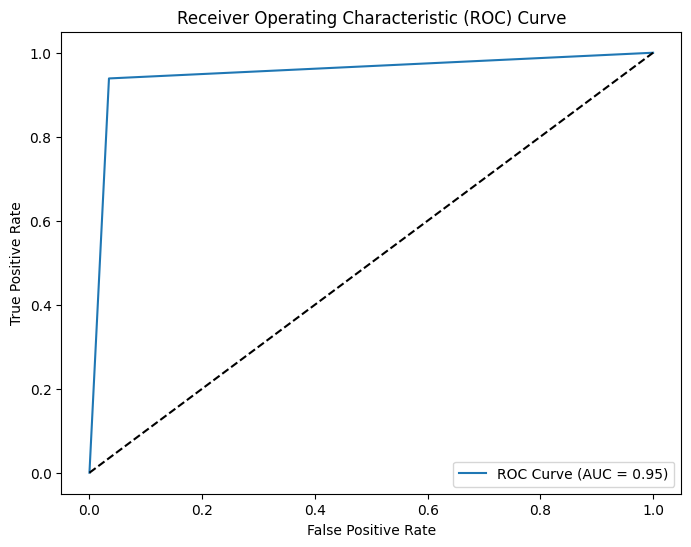

In [96]:
# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
auc_score = roc_auc_score(y_test, test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve- Test Data")
plt.legend(loc="lower right")
plt.show()

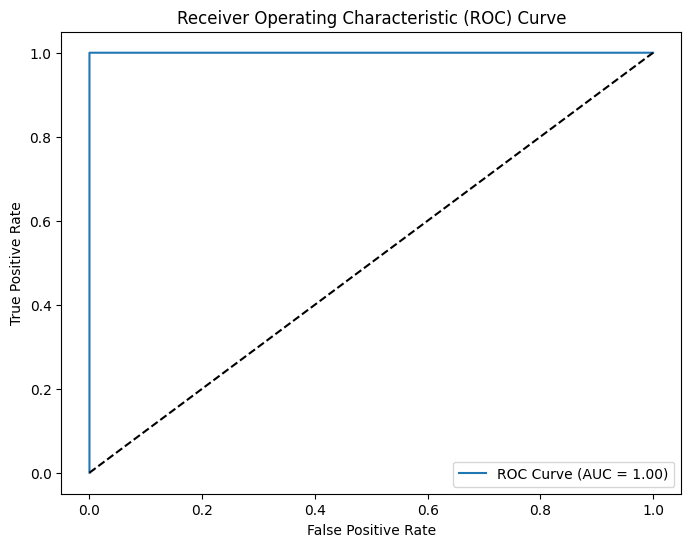

In [85]:
# ROC curve and AUC score - Train Data
fpr, tpr, thresholds = roc_curve(y_train, train_pred)
auc_score = roc_auc_score(y_train, train_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - Train Data")
plt.legend(loc="lower right")
plt.show()

In [86]:
df_status.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.15,30156308.00,28.00,1,1,10.00,2.00,1500.00,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.99,0.69,6.75
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.02,30202938.00,25.00,1,1,41.00,0.80,1210.00,unknown,1668701718,2021-04-01,1047.00,6.64,-0.22,6.95


In [90]:
# Predicting Status
user_data = np.array([[30156308, 28, 6.75, 1, 10, 1500, 1670798778, 3.99, 0.69]])
y_pred= model.predict(user_data)
if y_pred == 1:
    print("Won")
else:
    print("Lose")

Won


In [91]:
user_data = {
    'customer': [30156308],
    'country': [28],
    'selling_price_log': [6.75],
    'item type': [1],
    'application': [10],
    'width': [1500],
    'product_ref': [1670798778],
    'quantity tons_log': [6.75],
    'thickness_log': [0.69]
}

user_df = pd.DataFrame(user_data)

# Make the prediction
y_pred = model.predict(user_df)
if y_pred == 1:
    print("Won")
else:
    print("Lose")

Won


In [92]:
# Saving the model
with open("model2.pkl","wb") as ft:
    pickle.dump(model,ft) 

with open("model2.pkl","rb") as ft1:
    ml1 = pickle.load(ft1)

In [93]:
y_pred = ml1.predict(user_df)
if y_pred == 1:
    print("Won")
else:
    print("Lose")

Won
